In [39]:
from PIL import Image
import numpy as np
import indicoio
import os
import tqdm
from sklearn.cross_validation import train_test_split
from indicoio.custom import Collection
import re
import operator
from IPython.display import Image, display
from random import randint

In [2]:
indicoio.config.api_key = 'b7a7565f3467db2830811e9a17715178'

In [3]:
def get_paths():
    file_paths = []
    for root,_, files in  os.walk("amazon-fashion-women-new"):
        for image in files:
            file_paths.append(os.path.join(root,image))
    return file_paths

In [4]:
filePaths = get_paths()

In [5]:
filePaths[:5]

['amazon-fashion-women-new\\pic (1).jpg',
 'amazon-fashion-women-new\\pic (10).jpg',
 'amazon-fashion-women-new\\pic (100).jpg',
 'amazon-fashion-women-new\\pic (101).jpg',
 'amazon-fashion-women-new\\pic (102).jpg']

In [6]:
FilePaths_labels = []
FilePaths_labels_dict = {}
for fileP in filePaths:
    label = re.search(r"\(([0-9]+)", fileP).groups()[0]
    FilePaths_labels.extend([(fileP,label)])
    FilePaths_labels_dict[int(label)] = fileP

In [11]:
# For display purposes when predicting results
FilePaths_labels_dict.items()[:5]

[(1, 'amazon-fashion-women-new\\pic (1).jpg'),
 (2, 'amazon-fashion-women-new\\pic (2).jpg'),
 (3, 'amazon-fashion-women-new\\pic (3).jpg'),
 (4, 'amazon-fashion-women-new\\pic (4).jpg'),
 (5, 'amazon-fashion-women-new\\pic (5).jpg')]

In [12]:
# Randomly split the data set into Train and test.
train,test = train_test_split(FilePaths_labels,test_size=0.05,random_state=99)

In [14]:
print len(train), len(test)

252 14


In [15]:
# For training purposes:
collection = Collection("recommend_clothes")

# Add and Train the data
collection.add_data(train,batch=True)
collection.train()

{u'domain': None,
 u'input_type': u'image',
 u'model_type': u'classification',
 u'number_of_examples': 252,
 u'permissions': {u'read': [], u'write': []},
 u'public': False,
 u'registered': False,
 u'status': u'training'}

In [17]:
collection.info()

{u'domain': None,
 u'input_type': u'image',
 u'model_type': u'classification',
 u'number_of_examples': 252,
 u'permissions': {u'read': [], u'write': []},
 u'public': False,
 u'registered': False,
 u'status': u'ready'}

In [18]:
def showpic(file_ind):
    img_label = int(file_ind)
    pic_path = FilePaths_labels_dict[img_label]
    display(Image(filename=pic_path))

In [24]:
# Predict the test data and display the images

def showPredictedImg(img):
    predicted = collection.predict(img[0])
    print 'Test Image:'
    showpic(img[1])
    top5 = sorted(predicted.items(),key=operator.itemgetter(1),reverse=1)[:5]
    print 'Top 5 Predicted Images:'
    for top_label,_ in top5:
        showpic(top_label)

In [52]:
# Predict a random image from the test file.
def predictRandomTestImage():
    N = len(test)
    index_test_file = randint(0,N-1) #index_test_file = {0...N-1} N: number of test files
    test_this_file = test[index_test_file]
    showPredictedImg(test_this_file)

Test Image:


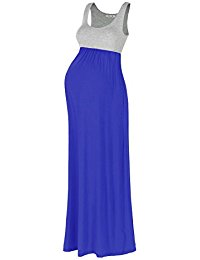

Top 5 Predicted Images:


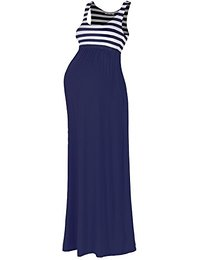

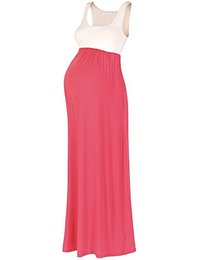

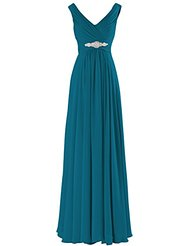

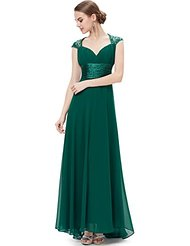

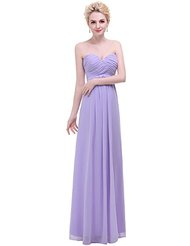

In [53]:
predictRandomTestImage()

Test Image:


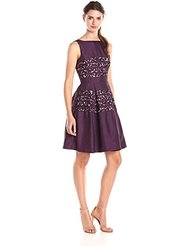

Top 5 Predicted Images:


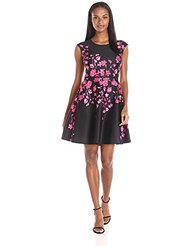

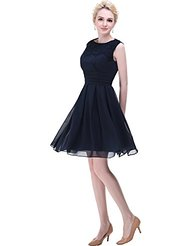

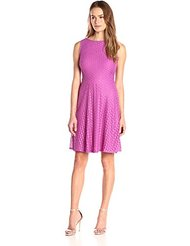

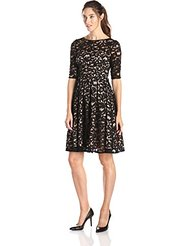

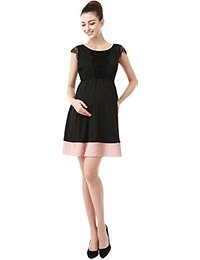

In [54]:
predictRandomTestImage()

Test Image:


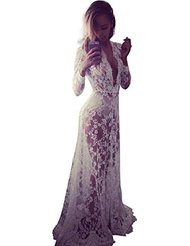

Top 5 Predicted Images:


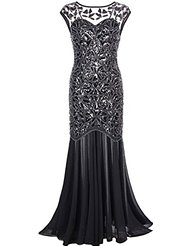

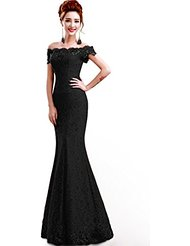

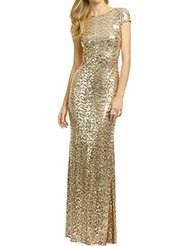

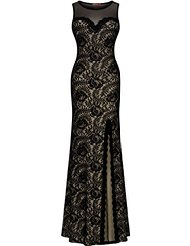

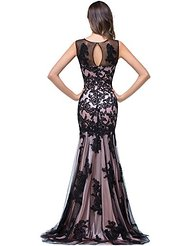

In [63]:
predictRandomTestImage()

Test Image:


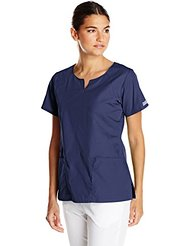

Top 5 Predicted Images:


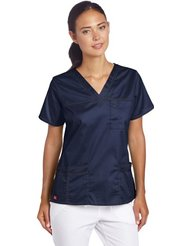

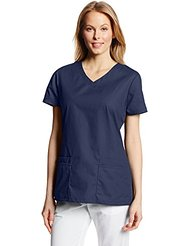

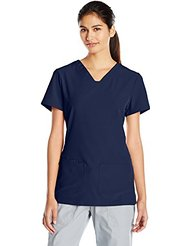

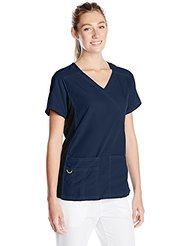

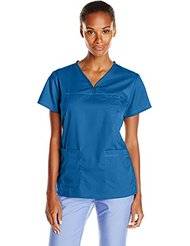

In [56]:
predictRandomTestImage()

Test Image:


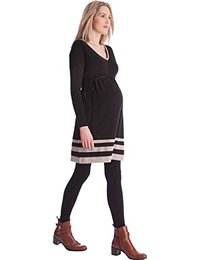

Top 5 Predicted Images:


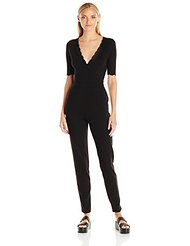

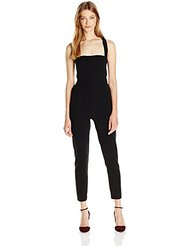

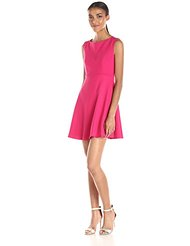

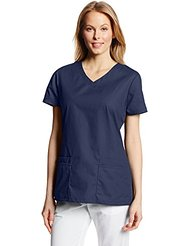

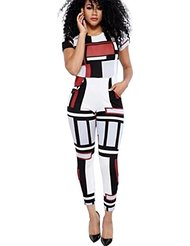

In [55]:
predictRandomTestImage()